<img src="https://pure.ups.edu.ec/skin/footerIcon/"/>

**Nombres:**  Pedro Jose Orellana

**Tema:**  Ejercicio 2 Covarianza

Dado el conjunto de datos Forest-Fires-Data (AVAC), realice el cálculo 
del coeficiente de correllación lineal de Pearson empleando Excel o Python. Deberá considerar las variables: viento (wind) y humedad relativa (rH). 

Deberá calcular también la regresión lineal e indicar la conclusión a la que ha llegado luego de haber obtenido el valor.

In [2]:
#Importamos la librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Se obtiene la url del dataset de forestfires alojado en un repositorio de Github
url = 'https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/forest-fires/forestfires.csv'
df = pd.read_csv(url, sep=',')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
#Calculo de la matriz de covarianza y coeficientes de correlacion 
wind = df['wind']
rh = df['RH']
correlacion = np.corrcoef(wind, rh)
covarianza = np.cov(wind, rh)

print("Covarianza:\n" + str(covarianza))
print("\nCorrelacion:\n" + str(correlacion))

Covarianza:
[[  3.21001904   2.02921971]
 [  2.02921971 266.25980238]]

Correlacion:
[[1.         0.06941007]
 [0.06941007 1.        ]]


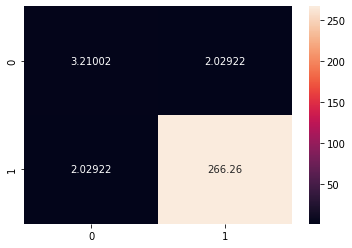

In [5]:
#Mapa de calor de la covarianza
sns.heatmap(covarianza, annot=True, fmt='g')
plt.show()

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df[["wind"]]
X_train = np.array(dataX)
y_train = df['RH'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente: \n', regr.intercept_)
# Error Cuadrado Medio
print("Error medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Puntaje de varianza: %.2f' % r2_score(y_train, y_pred))

Coeficientes: 
 [0.63215192]
Termino independiente: 
 41.74846661945818
Error medio: 264.46
Puntaje de varianza: 0.00
